# Preliminray Data Anlaysis 
1. Total No of Rows and Columns (Shape of Data)
2. Data Types 
3. Missing Value Analysis
4. Target Column Distribution
5. Numeric Features Summary
6. Categorical Features Summary


In [2]:
import pandas as pd
from loguru import logger



PATH = '../data/raw/loan_preprocessed.parquet'
def read_data(PATH=PATH):
    """Read the processed data from a Parquet file: data/raw/loan_preprocessed.parquet"""
    try:
        df = pd.read_parquet(PATH)
        logger.info(f"Successfully read processed data from {PATH}")
        return df
    except Exception as e: 
        logger.error(f"Error reading processed data: {e}")
        return None

df = read_data() 
df.sample(5)

2026-01-04 12:46:12.857 | INFO     | __main__:read_data:10 - Successfully read processed data from ../data/raw/loan_preprocessed.parquet


,loan_amnt,term,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,...,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog
1171914,5000,36 months,Manager,7 years,RENT,50000.0,Source Verified,Fully Paid,moving,IL,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1129166,12000,60 months,Attorney,2 years,RENT,125000.0,Source Verified,Fully Paid,debt_consolidation,IN,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
754472,30000,60 months,administrative assistant,10+ years,MORTGAGE,120000.0,Verified,Fully Paid,debt_consolidation,IL,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
656350,18375,36 months,Sorter,10+ years,MORTGAGE,52000.0,Source Verified,Fully Paid,credit_card,IL,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
807273,1825,36 months,Assistant Teacher,3 years,RENT,25000.0,Source Verified,Charged Off,debt_consolidation,TN,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Shape of the data

In [5]:
print('Number of rows:', df.shape[0])
print('Number of columns:', df.shape[1])



Number of rows: 1303638
Number of columns: 91


### Type of Data 

In [12]:
dtype_counts = df.dtypes.value_counts()
print("\nData Type Distribution:")
print(dtype_counts)




Data Type Distribution:
float64    77
object     12
int64       2
Name: count, dtype: int64


### Missing Value Analysis


In [15]:
logger.info("\n" + "=" * 60)
logger.info("MISSING VALUES ANALYSIS")
logger.info("=" * 60)

# Calculate missing values
missing_data = pd.DataFrame({
    'column': df.columns,
    'missing_count': df.isnull().sum(),
    'missing_percent': (df.isnull().sum() / len(df) * 100)
})

# Sort by missing percentage
missing_data = missing_data.sort_values('missing_percent', ascending=False)

# Summary stats
total_missing = missing_data['missing_count'].sum()
total_cells = df.shape[0] * df.shape[1]
print(f"\nOverall Missing Data:")
print(f"  Total missing values: {total_missing:,}")
print(f"  Percentage of dataset: {(total_missing / total_cells * 100):.2f}%")
print(f"  Columns with missing: {(missing_data['missing_count'] > 0).sum()}")
print(f"  Columns complete: {(missing_data['missing_count'] == 0).sum()}")

2026-01-04 12:58:13.276 | INFO     | __main__:<module>:1 - 
2026-01-04 12:58:13.278 | INFO     | __main__:<module>:2 - MISSING VALUES ANALYSIS
2026-01-04 12:58:13.279 | INFO     | __main__:<module>:3 - ============================================================



Overall Missing Data:
  Total missing values: 35,359,852
  Percentage of dataset: 29.81%
  Columns with missing: 74
  Columns complete: 17


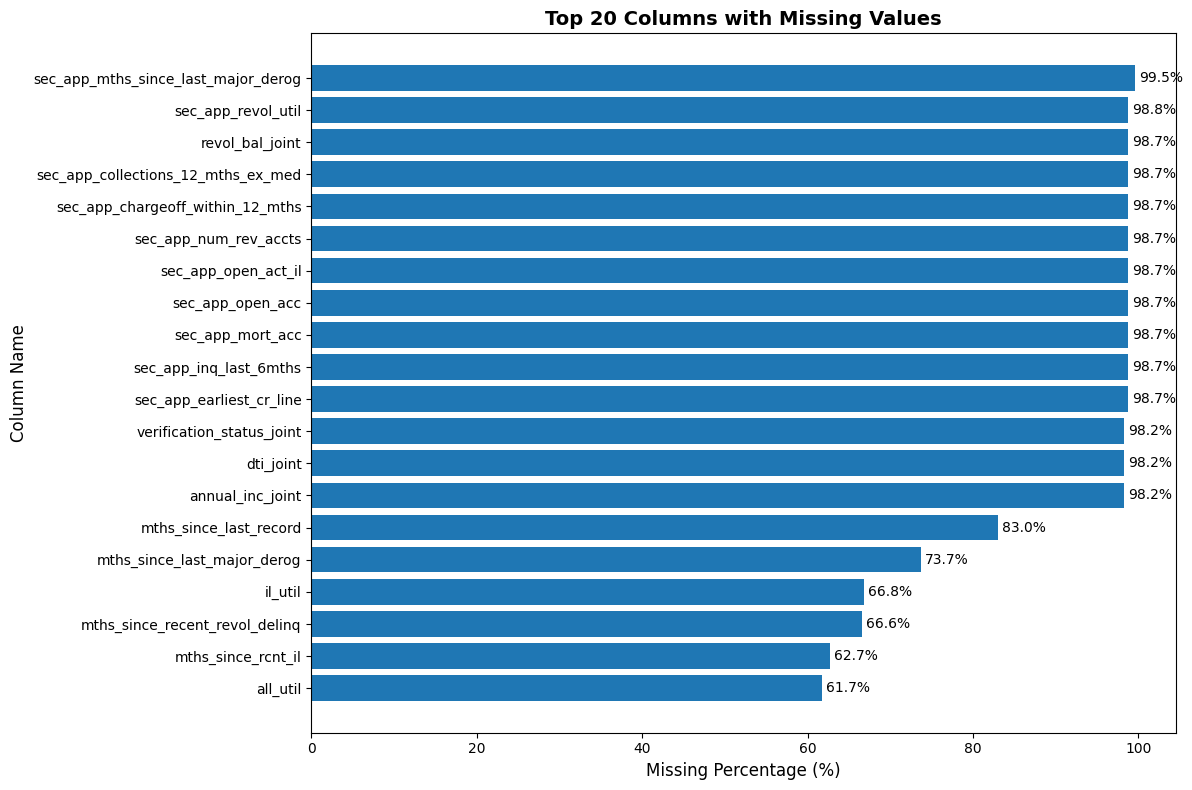

In [18]:
import matplotlib.pyplot as plt
cols_with_missing = missing_data[missing_data['missing_count'] > 0]


if len(cols_with_missing) > 0:
    top_missing = cols_with_missing.head(20)
    
    plt.figure(figsize=(12, 8))
    plt.barh(top_missing['column'], top_missing['missing_percent'])
    plt.xlabel('Missing Percentage (%)', fontsize=12)
    plt.ylabel('Column Name', fontsize=12)
    plt.title('Top 20 Columns with Missing Values', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    
    # Add percentage labels
    for i, v in enumerate(top_missing['missing_percent']):
        plt.text(v + 0.5, i, f'{v:.1f}%', va='center')
    
    plt.tight_layout()
    plt.show()

### Target Distribution

In [22]:


print("\nLoan Status Distribution:")
print(df['loan_status'].value_counts())

print("\n" + "-" * 60)
print("\nLoan Status Percentages:")
print(df['loan_status'].value_counts(normalize=True) * 100)

# Create binary target if not exists
if 'target' not in df.columns:
    df['target'] = df['loan_status'].map({
        'Fully Paid': 0,
        'Charged Off': 1,
        'Default': 1
    })

print("\n" + "-" * 60)
print("Binary Target Distribution:")
print(df['target'].value_counts())
print(f"\nDefault Rate: {df['target'].mean() * 100:.2f}%")


Loan Status Distribution:
loan_status
Fully Paid     1041952
Charged Off     261655
Default             31
Name: count, dtype: int64

------------------------------------------------------------

Loan Status Percentages:
loan_status
Fully Paid     79.926483
Charged Off    20.071139
Default         0.002378
Name: proportion, dtype: float64

------------------------------------------------------------
Binary Target Distribution:
target
0    1041952
1     261686
Name: count, dtype: int64

Default Rate: 20.07%


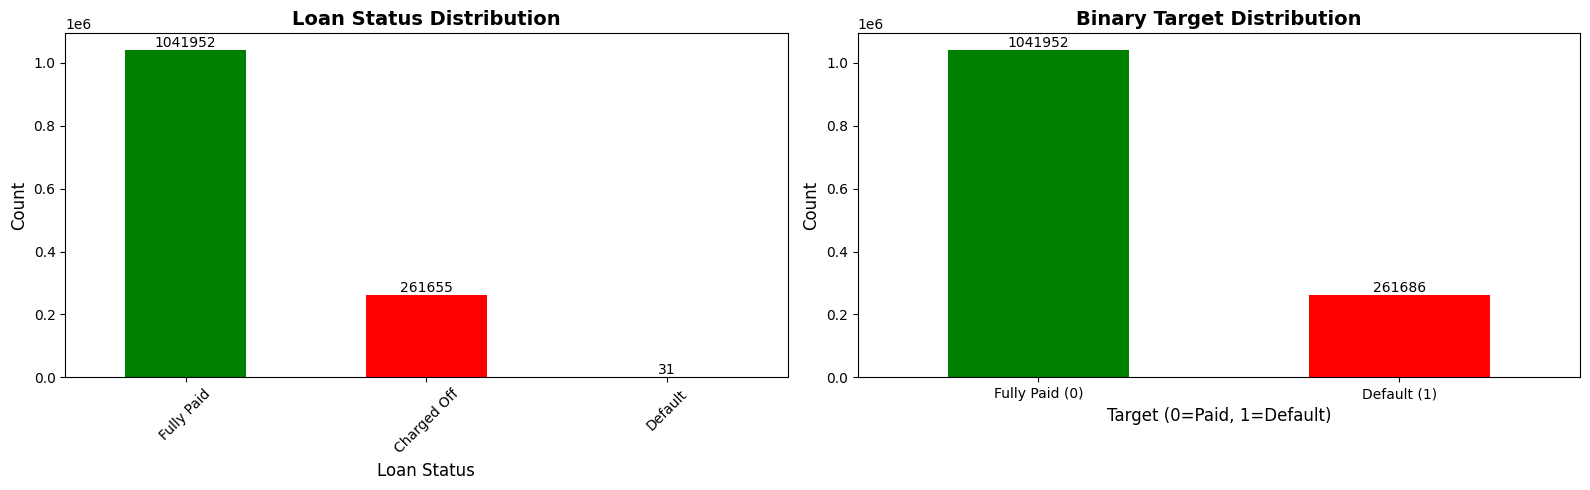

In [27]:

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Loan Status
df['loan_status'].value_counts().plot(kind='bar', ax=axes[0], color=['green', 'red', 'orange'])
axes[0].set_title('Loan Status Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Loan Status', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# Add count labels
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%d')

# Binary Target
df['target'].value_counts().plot(kind='bar', ax=axes[1], color=['green', 'red'])
axes[1].set_title('Binary Target Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Target (0=Paid, 1=Default)', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].set_xticklabels(['Fully Paid (0)', 'Default (1)'], rotation=0)

# Add count and percentage labels
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%d')

plt.tight_layout()
plt.show()


### Numeric Features Summary:
Numeric features are the backbone of credit models - they represent measurable financial behaviors (income, debt, credit utilization) that directly predict default risk. Before modeling, you need to understand their distributions, ranges, and data quality issues

In [28]:
# 6.1 Basic Statistics
logger.info("\n" + "=" * 60)
logger.info("NUMERIC FEATURES SUMMARY")
logger.info("=" * 60)

# Get numeric columns (exclude target if it's there)
numeric_features = [col for col in numeric_cols if col != 'target']

print(f"\nTotal numeric features: {len(numeric_features)}")
print("\nBasic Statistics:")
print(df[numeric_features].describe().T)

2026-01-04 13:33:05.773 | INFO     | __main__:<module>:2 - 
2026-01-04 13:33:05.775 | INFO     | __main__:<module>:3 - NUMERIC FEATURES SUMMARY
2026-01-04 13:33:05.776 | INFO     | __main__:<module>:4 - ============================================================



Total numeric features: 79

Basic Statistics:
                                         count          mean           std  \
loan_amnt                            1303638.0  14416.838167   8699.573905   
annual_inc                           1303638.0  76158.752307  70048.265722   
dti                                  1303326.0     18.258837     10.938465   
delinq_2yrs                          1303638.0      0.317620      0.877268   
inq_last_6mths                       1303637.0      0.659131      0.941127   
...                                        ...           ...           ...   
sec_app_open_act_il                    16517.0      2.946782      3.219020   
sec_app_num_rev_accts                  16517.0     12.818551      8.354402   
sec_app_chargeoff_within_12_mths       16517.0      0.056669      0.460011   
sec_app_collections_12_mths_ex_med     16517.0      0.088454      0.429434   
sec_app_mths_since_last_major_derog     5936.0     36.339960     24.000491   

                

In [32]:
# 6.2 Check for constant columns (zero variance)
print("\n" + "-" * 60)
print("Checking for constant/low-variance columns...")
print("-" * 60)

constant_cols = []
for col in numeric_features:
    if df[col].nunique() == 1:
        constant_cols.append(col)

if constant_cols:
    print(f"\nConstant columns found: {len(constant_cols)}")
    for col in constant_cols:
        print(f"  - {col}")
else:
    print("\nNo constant columns found.")

# Check for very low variance (same value >99%)
low_variance_cols = []
for col in numeric_features:
    if df[col].notna().sum() > 0:
        mode_freq = df[col].value_counts(normalize=True).iloc[0]
        if mode_freq > 0.99:
            low_variance_cols.append((col, mode_freq))

if low_variance_cols:
    print(f"\nLow variance columns (>99% same value): {len(low_variance_cols)}")
    for col, freq in low_variance_cols:
        print(f"  - {col}: {freq*100:.2f}% same value")



------------------------------------------------------------
Checking for constant/low-variance columns...
------------------------------------------------------------

No constant columns found.

Low variance columns (>99% same value): 5
  - acc_now_delinq: 99.53% same value
  - chargeoff_within_12_mths: 99.19% same value
  - delinq_amnt: 99.63% same value
  - num_tl_120dpd_2m: 99.92% same value
  - num_tl_30dpd: 99.68% same value


### Categorical Features Summary

In [33]:

logger.info("\n" + "=" * 60)
logger.info("CATEGORICAL FEATURES SUMMARY")
logger.info("=" * 60)

print(f"\nTotal categorical features: {len(categorical_cols)}")

# Categorize by cardinality
low_cardinality = []    # < 10 unique
medium_cardinality = [] # 10-50 unique
high_cardinality = []   # > 50 unique

for col in categorical_cols:
    n_unique = df[col].nunique()
    if n_unique < 10:
        low_cardinality.append((col, n_unique))
    elif n_unique < 50:
        medium_cardinality.append((col, n_unique))
    else:
        high_cardinality.append((col, n_unique))

print(f"\nCardinality Distribution:")
print(f"  Low (<10 unique): {len(low_cardinality)}")
print(f"  Medium (10-50 unique): {len(medium_cardinality)}")
print(f"  High (>50 unique): {len(high_cardinality)}")


2026-01-04 14:08:25.228 | INFO     | __main__:<module>:2 - 
2026-01-04 14:08:25.230 | INFO     | __main__:<module>:3 - CATEGORICAL FEATURES SUMMARY
2026-01-04 14:08:25.231 | INFO     | __main__:<module>:4 - ============================================================



Total categorical features: 12

Cardinality Distribution:
  Low (<10 unique): 6
  Medium (10-50 unique): 2
  High (>50 unique): 4


In [35]:
# 7.2 Detail by cardinality
print("\n" + "-" * 80)
print("LOW CARDINALITY FEATURES (<10 unique):")
print("-" * 80)
for col, n_unique in sorted(low_cardinality, key=lambda x: x[1]):
    print(f"{col:<40} | Unique: {n_unique}")
    print(f"  Values: {df[col].unique()[:10].tolist()}")
    print()

if medium_cardinality:
    print("\n" + "-" * 80)
    print("MEDIUM CARDINALITY FEATURES (10-50 unique):")
    print("-" * 80)
    for col, n_unique in sorted(medium_cardinality, key=lambda x: x[1]):
        print(f"{col:<40} | Unique: {n_unique}")

if high_cardinality:
    print("\n" + "-" * 80)
    print("HIGH CARDINALITY FEATURES (>50 unique):")
    print("-" * 80)
    for col, n_unique in sorted(high_cardinality, key=lambda x: x[1]):
        print(f"{col:<40} | Unique: {n_unique:,}")
        print(f"  Sample values: {df[col].value_counts().head(3).to_dict()}")



--------------------------------------------------------------------------------
LOW CARDINALITY FEATURES (<10 unique):
--------------------------------------------------------------------------------
term                                     | Unique: 2
  Values: [' 36 months', ' 60 months']

application_type                         | Unique: 2
  Values: ['Joint App', 'Individual']

verification_status                      | Unique: 3
  Values: ['Source Verified', 'Verified', 'Not Verified']

loan_status                              | Unique: 3
  Values: ['Fully Paid', 'Charged Off', 'Default']

verification_status_joint                | Unique: 3
  Values: ['Source Verified', 'Verified', 'Not Verified', None]

home_ownership                           | Unique: 6
  Values: ['MORTGAGE', 'RENT', 'OWN', 'ANY', 'NONE', 'OTHER']


--------------------------------------------------------------------------------
MEDIUM CARDINALITY FEATURES (10-50 unique):
------------------------------------